<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW5/problem2_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW5/wine_flag_all.csv")

In [30]:
df

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [31]:
df.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


In [32]:
df.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_DF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object' or df.dtypes[i]=='bool':
        encoded_DF[df.columns[i]] = le.fit_transform(df[df.columns[i]])

encoded_DF


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


# Contingency table

In [34]:
df_ct1 = pd.crosstab(df.Sugar_flag, df.Type)
df_ct1

Type,Red,White
Sugar_flag,,
High,237,1382
Low,848,878


In [35]:
df_ct2 = pd.crosstab(df.Alcohol_flag, df.Type)
df_ct2

Type,Red,White
Alcohol_flag,,
High,485,1176
Low,600,1084


In [36]:
df_ct3 = pd.crosstab([df.Alcohol_flag,df.Sugar_flag], df.Type)
df_ct3

Type                     Red  White
Alcohol_flag Sugar_flag            
High         High        118    592
             Low         367    584
Low          High        119    790
             Low         481    294

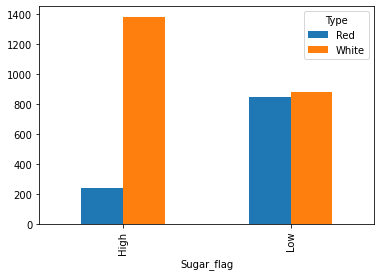

In [37]:
df_ct1.plot.bar()

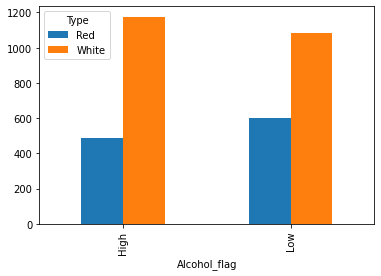

In [38]:
df_ct2.plot.bar()

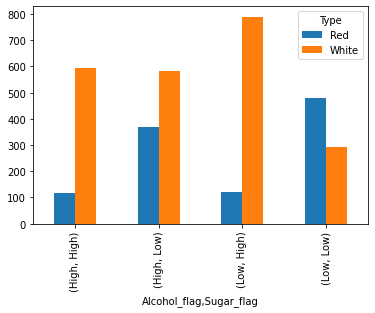

In [39]:
df_ct3.plot.bar()

Task 7. Use the tables from the previous step to calculate:
1. The prior probability of Type = Red and Type = White.
2. The probability of high and low alcohol content.
3. The probability of high and low sugar content.
4. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
5. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

Create the NB Classifier

In [46]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_DF.iloc[:,1:3]
y = encoded_DF.iloc[:,0:1]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


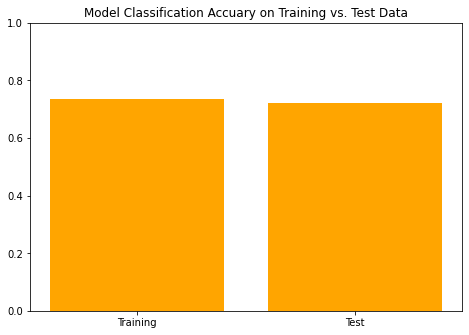

In [47]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [45]:
encoded_DF.iloc[:,0:1]

,Type
0,0
1,0
2,0
3,0
4,0
...,...
3340,1
3341,1
3342,1
3343,1
